In [ ]:
# Análise Estatística dos Penguins
#Objetivo: aplicar bootstrapping para estimar intervalos de confiança

In [ ]:
#Importação das bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregar o conjunto de dados dos pinguins

penguins = pd.read_csv("./penguins_size.csv")

penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Verificar informações do conjunto de dados

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
3# Filtrar dados para pinguins machos e calcular a massa corporal média

male = penguins['sex'] == 'MALE'
malem = penguins[male]

mediamale = np.mean(malem['body_mass_g'])
mediamale

4545.684523809524

In [ ]:
# Filtrar dados para pinguins fêmeas e calcular a massa corporal média

female = penguins['sex'] == 'FEMALE'
femalem = penguins[female]

mediafemale = np.mean(femalem['body_mass_g'])
mediafemale

3862.2727272727275

In [ ]:
# Calcular a diferença entre as médias de massa corporal dos pinguins machos e fêmeas

ge = mediamale - mediafemale
ge

683.4117965367964

In [27]:
np.mean(penguins.loc[penguins.sex == 'MALE', 'body_mass_g']) - \
    np.mean(penguins.loc[penguins.sex == 'FEMALE', 'body_mass_g'])

683.4117965367964

In [ ]:
# Realizar bootstrapping para estimar a diferença de médias

n = penguins.shape[0]
penguins_boot = penguins.sample(n, replace=True)

np.mean(penguins_boot.loc[penguins_boot.sex == 'MALE', 'body_mass_g']) - \
    np.mean(penguins_boot.loc[penguins_boot.sex == 'FEMALE', 'body_mass_g'])

738.7318529643135

(array([5.67396206e-05, 2.26958482e-04, 5.67396206e-05, 5.67396206e-05,
        4.53916965e-04, 3.40437724e-04, 5.10656585e-04, 9.07833930e-04,
        9.07833930e-04, 1.98588672e-03, 2.38306407e-03, 3.06393951e-03,
        3.63133572e-03, 4.36895079e-03, 4.70938851e-03, 5.16330547e-03,
        5.10656585e-03, 5.04982623e-03, 3.63133572e-03, 4.76612813e-03,
        2.78024141e-03, 2.38306407e-03, 2.04262634e-03, 6.24135827e-04,
        9.64573550e-04, 3.97177344e-04, 1.13479241e-04, 0.00000000e+00,
        0.00000000e+00, 5.67396206e-05]),
 array([407.76135809, 425.3857269 , 443.01009572, 460.63446453,
        478.25883335, 495.88320217, 513.50757098, 531.1319398 ,
        548.75630862, 566.38067743, 584.00504625, 601.62941507,
        619.25378388, 636.8781527 , 654.50252152, 672.12689033,
        689.75125915, 707.37562796, 724.99999678, 742.6243656 ,
        760.24873441, 777.87310323, 795.49747205, 813.12184086,
        830.74620968, 848.3705785 , 865.99494731, 883.61931613,
      

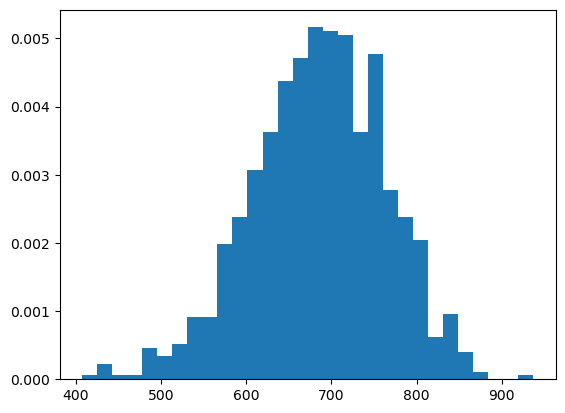

In [ ]:
# Executar múltiplas iterações de bootstrapping e armazenar os resultados

boot_stats = np.array([])

for i in range(1000):
    penguins_boot = penguins.sample(n, replace=True)
    
    stat = np.mean(penguins_boot.loc[penguins_boot.sex == 'MALE', 'body_mass_g']) - \
           np.mean(penguins_boot.loc[penguins_boot.sex == 'FEMALE', 'body_mass_g'])
        
    boot_stats = np.append(boot_stats, stat)

plt.hist(boot_stats, bins=30, density=True)

   
   

In [ ]:
# Calcular o intervalo de confiança de 95% para a diferença de médias

np.quantile(boot_stats - ge,0.5)

4.937148005107247

In [ ]:
np.percentile(boot_stats - 683.41,50)

4.938944541903652

In [ ]:
# Calcular o intervalo de confiança de 95% para a diferença de médias

pd.DataFrame({'MyData': boot_stats - ge}).quantile(0.5)

MyData    4.937148
Name: 0.5, dtype: float64

In [ ]:
# Calcular o intervalo de confiança de 95% para a diferença de médias

l = np.percentile(boot_stats - ge, 2.5)
print(l)
u = np.percentile(boot_stats - ge, 100 - 2.5)
print(u)

-161.01008482278613
148.32164337516141


In [ ]:
# Resultados do intervalo de confiança

print(f"Intervalo de confiança minimo: {ge - u}")
print(f"Intervalo de confiança maximo: {ge - l}")

Intervalo de confiança minimo: 535.0901531616349
Intervalo de confiança maximo: 844.4218813595825


In [ ]:
#  Conclusões

# - O intervalo de confiança estimado por bootstrapping fornece uma medida robusta da média, sem a necessidade de assumir normalidade dos dados.
# - A técnica mostrou-se eficaz para avaliar a incerteza da estimativa e complementar a análise exploratória.